In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train = tf.keras.utils.normalize(X_train , axis=1)
X_test = tf.keras.utils.normalize(X_test , axis=1)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28 , 28)))
model.add(tf.keras.layers.Dense(128 , activation='relu'))
model.add(tf.keras.layers.Dense(128 , activation='relu'))
model.add(tf.keras.layers.Dense(10 , activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [6]:
model.fit(X_train , y_train , epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8632 - loss: 0.4823
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9672 - loss: 0.1092
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9771 - loss: 0.0731
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9836 - loss: 0.0490
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9870 - loss: 0.0391
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9912 - loss: 0.0275
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9928 - loss: 0.0233
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9940 - loss: 0.0179
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9945 - loss: 0.0157
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9958 - loss: 0.0134


In [7]:
model.save('handwritten_digit_recognition.keras')

In [8]:
model = tf.keras.models.load_model('handwritten_digit_recognition.keras')

In [9]:
loss , accuracy = model.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.1354


In [10]:
print(loss)
print(accuracy)

0.11093070358037949
0.9745000004768372


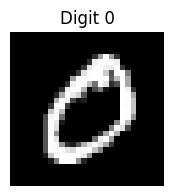

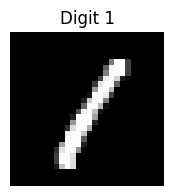

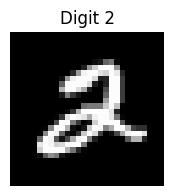

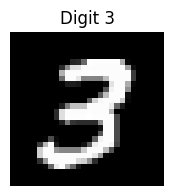

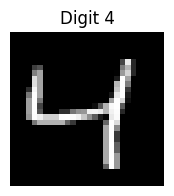

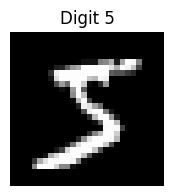

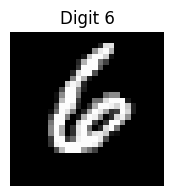

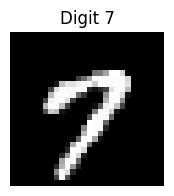

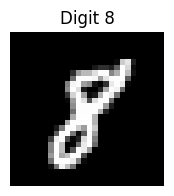

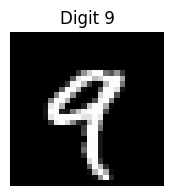

Saved samples to /content/mnist_samples/


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import os
from PIL import Image

# Load MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Create output directory
os.makedirs('/content/mnist_samples', exist_ok=True)

# Save one sample of each digit (0-9)
for digit in range(10):
    # Find the first occurrence of each digit
    idx = np.where(y_train == digit)[0][0]
    digit_img = X_train[idx]

    # Save as PNG
    img = Image.fromarray(digit_img)
    img.save(f'/content/mnist_samples/digit_{digit}.png')

    # Display
    plt.figure(figsize=(2,2))
    plt.imshow(digit_img, cmap='gray')
    plt.title(f"Digit {digit}")
    plt.axis('off')
    plt.show()

print("Saved samples to /content/mnist_samples/")

In [13]:
def predict_digit(image_path):
    try:
        # Load and preprocess image
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError("Could not read image")

        # Resize and invert if needed
        img = cv2.resize(img, (28, 28))
        if np.mean(img) > 127:  # If background is lighter than digit
            img = 255 - img

        # Normalize and reshape
        img = img / 255.0
        img = img.reshape(1, 28, 28)

        # Make prediction
        prediction = model.predict(img, verbose=0)
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction)

        # Display results
        plt.figure(figsize=(6, 3))
        plt.subplot(1, 2, 1)
        plt.imshow(img[0], cmap='gray')
        plt.title(f"Predicted: {predicted_digit}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        bars = plt.bar(range(10), prediction[0], color='skyblue')
        bars[predicted_digit].set_color('red')
        plt.xticks(range(10))
        plt.title('Confidence Scores')
        plt.tight_layout()
        plt.show()

        print(f"\nImage: {os.path.basename(image_path)}")
        print(f"Predicted digit: {predicted_digit} ({confidence:.2%} confidence)")

        return predicted_digit

    except Exception as e:
        print(f"Error processing {image_path}: {str(e)}")
        return None


Processing custom images...


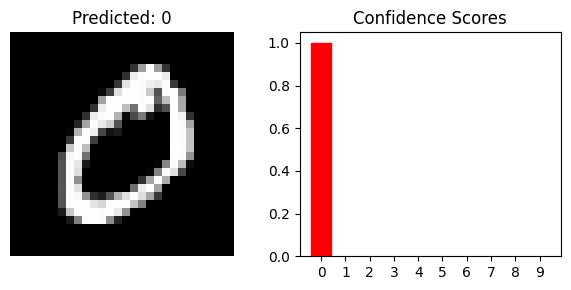


Image: digit_0.png
Predicted digit: 0 (100.00% confidence)


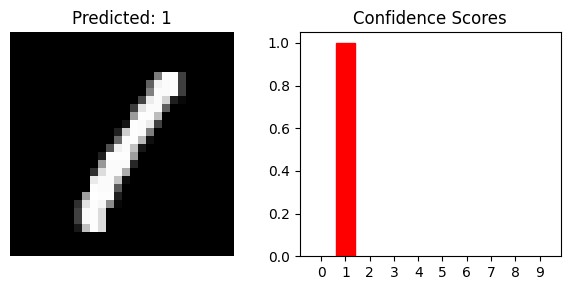


Image: digit_1.png
Predicted digit: 1 (100.00% confidence)


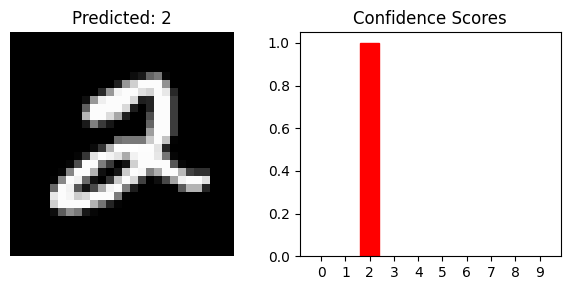


Image: digit_2.png
Predicted digit: 2 (100.00% confidence)


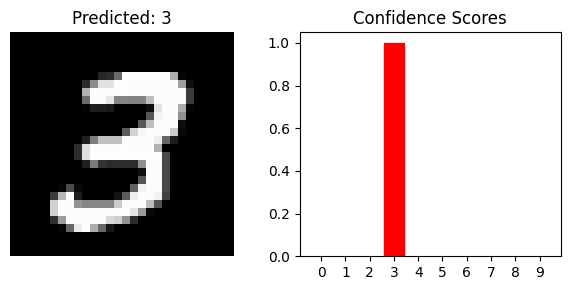


Image: digit_3.png
Predicted digit: 3 (100.00% confidence)


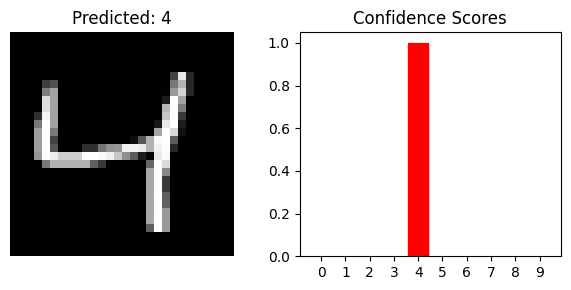


Image: digit_4.png
Predicted digit: 4 (100.00% confidence)


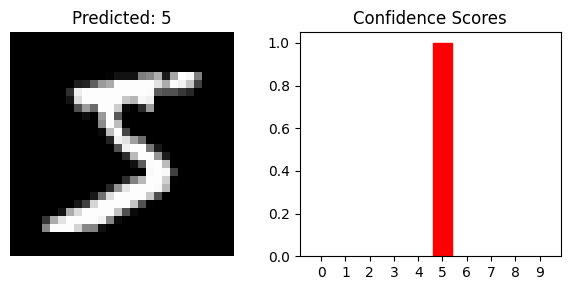


Image: digit_5.png
Predicted digit: 5 (100.00% confidence)


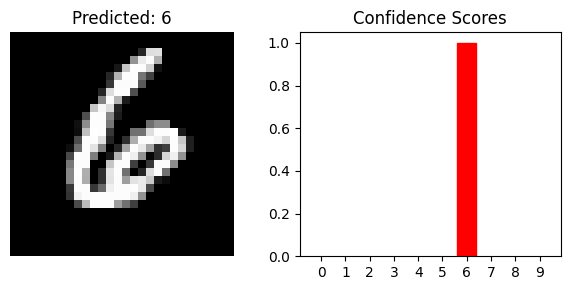


Image: digit_6.png
Predicted digit: 6 (100.00% confidence)


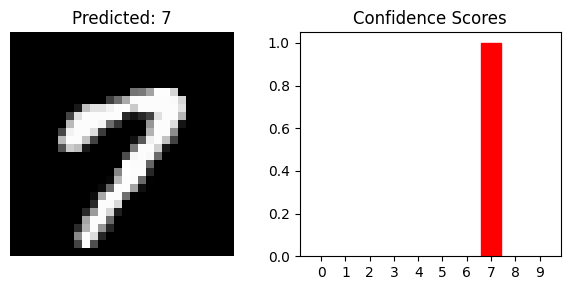


Image: digit_7.png
Predicted digit: 7 (100.00% confidence)


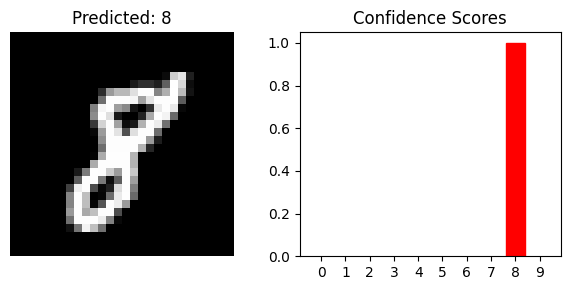


Image: digit_8.png
Predicted digit: 8 (100.00% confidence)


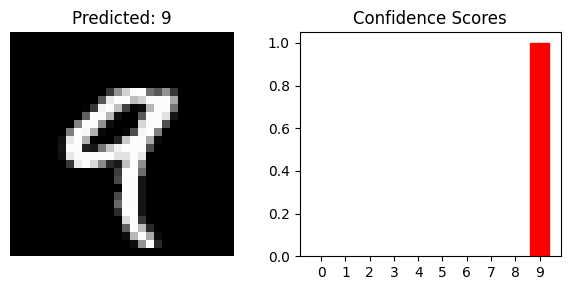


Image: digit_9.png
Predicted digit: 9 (100.00% confidence)

Finished processing. No more files found after digit_9.png


In [14]:
print("\nProcessing custom images...")
image_number = 0
while True:
    image_path = f"/content/mnist_samples/digit_{image_number}.png"
    if not os.path.isfile(image_path):
        print(f"\nFinished processing. No more files found after digit_{image_number-1}.png")
        break

    predict_digit(image_path)
    image_number += 1